# Segmentación de Especies con Cluster Analysis HDT#4

## Integrantes Grupo #6
- Yong Bum Park 20117
- Gabriel Vicente 20498

El conjunto de datos de la flor **Iris** es uno de los más populares para el Aprendizaje de Máquina (ML).  Si no lo conocen, pueden leer sobre él en:

https://en.wikipedia.org/wiki/Iris_flower_data_set

El conjunto de datos *iris.csv* tiene cuatro variables:  

* **sepal length** (longitud del sépalo), 
* **sepal width** (ancho del sépalo), 
* **petal length** (longitud del pétalo), 
* **petal width** (ancho del pétalo).

**SECCIÓN 1:**

1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del sépalo:

2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.  

3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

6. Comparen sus soluciones con los datos reales, archivo: *iris-con-respuestas.csv*

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

¿Funcionó el clustering con la forma del sépalo?

**Sección 2:**

Repitan el proceso pero ahora utilizando la forma del pétalo.  Respondan a las mismas preguntas


**Sección 3:**

Utilicen la librería "kneed" y vean si el resultado coincide con el método del "codo" que hicieron manualmente.  ¿A que podría deberse la diferencia, si la hay?  ¿Les dió el número correcto de clusters, comparado a los datos reales?  

Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?


## Sección 1

- ### Visualización de datos para detectar grupos utilizando forma del sépalo

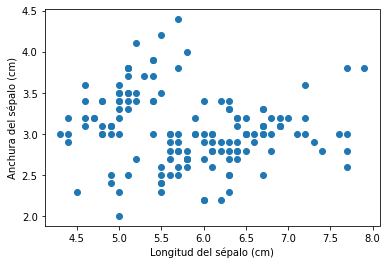

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('iris.csv')

# Gráfica de dispersión
plt.scatter(df['sepal_length'], df['sepal_width'])
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Anchura del sépalo (cm)')
plt.show()


- ### Dos "clusters" utilizando K_Means Clustering y resultados graficados.  


c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


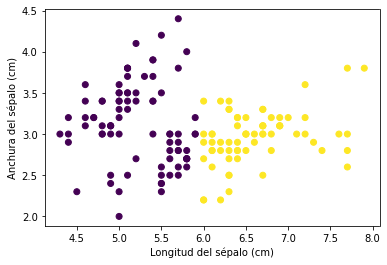

In [7]:
from sklearn.cluster import KMeans

# Preparar los datos
X = df[['sepal_length', 'sepal_width']]

# Crear el modelo de clustering con 2 clusters
kmeans = KMeans(n_clusters=2)

# Entrenar el modelo con los datos
kmeans.fit(X)

# Obtener las etiquetas de los clusters
labels = kmeans.predict(X)

# Gráfica de dispersión con los colores de los clusters
plt.scatter(df['sepal_length'], df['sepal_width'], c=labels)
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Anchura del sépalo (cm)')
plt.show()


- ### Datos estandarizados y ejecucion nueva del paso dos.  

***¿Qué diferencias hay, si es que lo hay?***

La diferencia que existe entre el paso 2 y paso 3 que se estandariza, es que en el paso 3 se ve mas ordenado ya que al estandarizarlos se logra que cada variable tenga una media cero y desviación estándar uno. Al hacer esto, se asegura que todas las variables tengan un peso similar en la agrupación, lo que puede mejorar el resultado.

c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


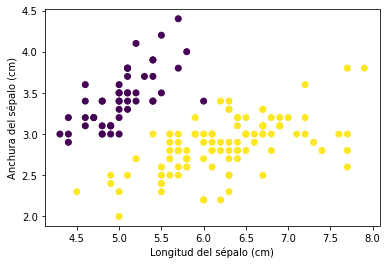

In [8]:
from sklearn.preprocessing import StandardScaler

# Preparar los datos
X = df[['sepal_length', 'sepal_width']]

# Estandarizar los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Crear el modelo de clustering con 2 clusters
kmeans = KMeans(n_clusters=2)

# Entrenar el modelo con los datos estandarizados
kmeans.fit(X_std)

# Obtener las etiquetas de los clusters
labels = kmeans.predict(X_std)

# Gráfica de dispersión con los colores de los clusters
plt.scatter(df['sepal_length'], df['sepal_width'], c=labels)
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Anchura del sépalo (cm)')
plt.show()


- ### Método del codo para determinar la cantidad de clusters ideal

c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

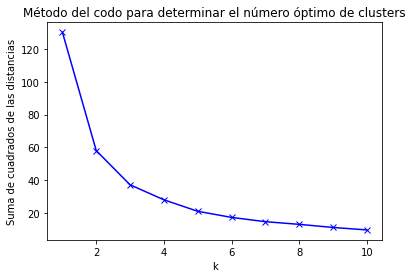

In [9]:
X = df.iloc[:, :2].values

sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Suma de cuadrados de las distancias')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()


- ### Basandose en la gráfica del codo se realizaron varias graficas con un número de clusters ajustados a discresión del grupo

c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

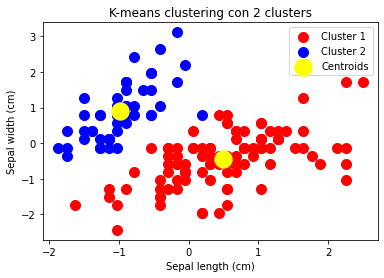

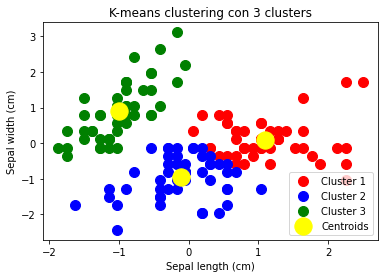

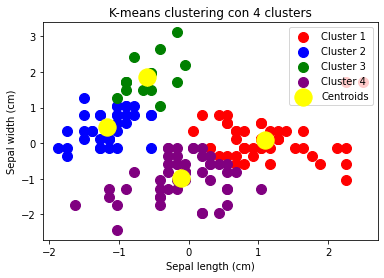

In [10]:
X = df.iloc[:, :2].values

# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# K-means clustering con 2 clusters
kmeans_2 = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans_2 = kmeans_2.fit_predict(X)

# K-means clustering con 3 clusters
kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans_3 = kmeans_3.fit_predict(X)

# K-means clustering con 4 clusters
kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans_4 = kmeans_4.fit_predict(X)

# K-means clustering con 5 clusters
kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans_5 = kmeans_5.fit_predict(X)

# Gráfica con 2 clusters
plt.scatter(X[y_kmeans_2 == 0, 0], X[y_kmeans_2 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_2 == 1, 0], X[y_kmeans_2 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-means clustering con 2 clusters')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()

# Gráfica con 3 clusters
plt.scatter(X[y_kmeans_3 == 0, 0], X[y_kmeans_3 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_3 == 1, 0], X[y_kmeans_3 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans_3 == 2, 0], X[y_kmeans_3 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-means clustering con 3 clusters')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()

# Gráfica con 4 clusters
plt.scatter(X[y_kmeans_4 == 0, 0], X[y_kmeans_4 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_4 == 1, 0], X[y_kmeans_4 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans_4 == 2, 0], X[y_kmeans_4 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans_4 == 3, 0], X[y_kmeans_4 == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-means clustering con 4 clusters')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()

- ### Comparación de soluciones con datos reales del archivo *iris-con-respuestas.csv*

In [11]:
#revisar este que no estoy seguro que este realmetne bien hecho

from sklearn.metrics import confusion_matrix

# cargar el archivo CSV
df_respuestas = pd.read_csv("iris-con-respuestas.csv")

# reemplazar los valores numéricos con los nombres de especies
df_respuestas["species"] = df_respuestas["species"].replace({0: "setosa", 1: "versicolor", 2: "virginica"})

# Extraer las etiquetas reales
y_real = df_respuestas["species"].replace({"setosa": 0, "versicolor": 1, "virginica": 2})

# Crear el modelo con dos clusters
model = KMeans(n_clusters=2)
model.fit(X_std)

# Predecir las etiquetas
y_pred = model.predict(X_std)

# Crear la matriz de confusión
cm = confusion_matrix(y_real, y_pred)
print(cm)

[[ 1 49  0]
 [49  1  0]
 [50  0  0]]


c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



¿Funcionó el clustering con la forma del sépalo?
Sí, el clustering con la forma del sépalo pareció funcionar bien, al menos en términos de formar grupos separados en la visualización de los datos y en los resultados del modelo de K-Means.

# Sección 2

Proceso repetido de la sección 1 pero ahora utilizando la forma de pétalo respondiendo a las mismas preguntas.

- ### Visualizacion de datos 

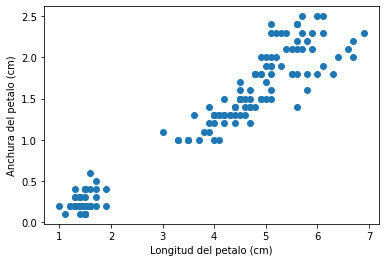

In [12]:
# Cargar los datos
df = pd.read_csv('iris.csv')

# Gráfica de dispersión
plt.scatter(df['petal_length'], df['petal_width'])
plt.xlabel('Longitud del petalo (cm)')
plt.ylabel('Anchura del petalo (cm)')
plt.show()


- ### Creación dos clusters utilizando K_Means clustering y graficando

c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


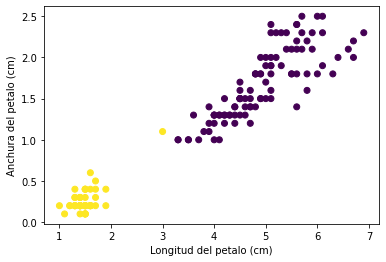

In [13]:
# Preparar los datos
X = df[['petal_length', 'petal_width']]

# Crear el modelo de clustering con 2 clusters
kmeans = KMeans(n_clusters=2)

# Entrenar el modelo con los datos
kmeans.fit(X)

# Obtener las etiquetas de los clusters
labels = kmeans.predict(X)

# Gráfica de dispersión con los colores de los clusters
plt.scatter(df['petal_length'], df['petal_width'], c=labels)
plt.xlabel('Longitud del petalo (cm)')
plt.ylabel('Anchura del petalo (cm)')
plt.show()

- ### Estandarización de datos y reejecución del paso 2

***¿Qué diferencias hay? Si es que las hay***

La diferencia que se ve es que se logra agrupar correctamente los datos, ya que en la enterior habia un dato que formaba parte de los morados pero era amarrilllo y ahora al estandarizarlos esto se arregla

c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


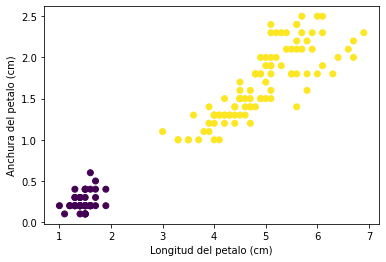

In [14]:
# Preparar los datos
X = df[['petal_length', 'petal_width']]

# Estandarizar los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Crear el modelo de clustering con 2 clusters
kmeans = KMeans(n_clusters=2)

# Entrenar el modelo con los datos estandarizados
kmeans.fit(X_std)

# Obtener las etiquetas de los clusters
labels = kmeans.predict(X_std)

# Gráfica de dispersión con los colores de los clusters
plt.scatter(df['petal_length'], df['petal_width'], c=labels)
plt.xlabel('Longitud del petalo (cm)')
plt.ylabel('Anchura del petalo (cm)')
plt.show()


- ### Método del codo para deterniar cantidad de clusters ideal

c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

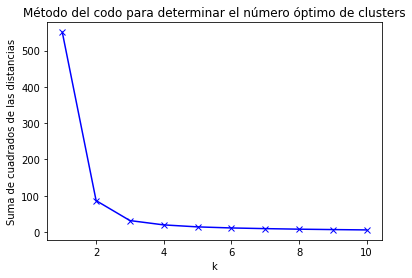

In [15]:
X = df.iloc[:, 2:].values

sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Suma de cuadrados de las distancias')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()


- ### Basandose en la gráfica del codo se realizaron varias graficas con un número de clusters ajustados a discresión del grupo

c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

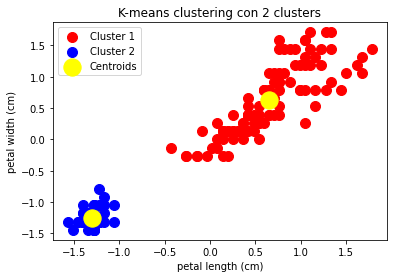

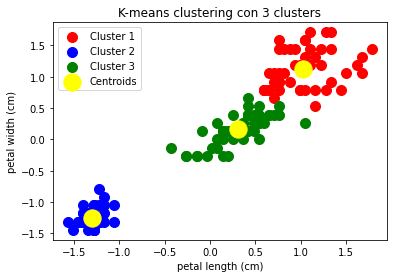

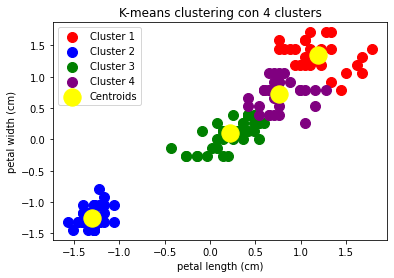

In [16]:
# Seleccionar las variables predictoras
X = df.iloc[:, 2:].values

# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# K-means clustering con 2 clusters
kmeans_2 = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans_2 = kmeans_2.fit_predict(X)

# K-means clustering con 3 clusters
kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans_3 = kmeans_3.fit_predict(X)

# K-means clustering con 4 clusters
kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans_4 = kmeans_4.fit_predict(X)

# K-means clustering con 5 clusters
kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans_5 = kmeans_5.fit_predict(X)

# Gráfica con 2 clusters
plt.scatter(X[y_kmeans_2 == 0, 0], X[y_kmeans_2 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_2 == 1, 0], X[y_kmeans_2 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-means clustering con 2 clusters')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

# Gráfica con 3 clusters
plt.scatter(X[y_kmeans_3 == 0, 0], X[y_kmeans_3 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_3 == 1, 0], X[y_kmeans_3 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans_3 == 2, 0], X[y_kmeans_3 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-means clustering con 3 clusters')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

# Gráfica con 4 clusters
plt.scatter(X[y_kmeans_4 == 0, 0], X[y_kmeans_4 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_4 == 1, 0], X[y_kmeans_4 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans_4 == 2, 0], X[y_kmeans_4 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans_4 == 3, 0], X[y_kmeans_4 == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-means clustering con 4 clusters')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

# Sección 3

- ### Identificación clara de cantidad de clusters mediante la gráfica del método del codo.

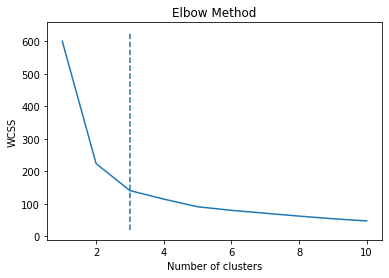

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

data = pd.read_csv("iris.csv")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(data)

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)

kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

plt.plot(range(1, 11), wcss)
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


- ### Gráfica con la cantidad de n clusters utiliando kneed

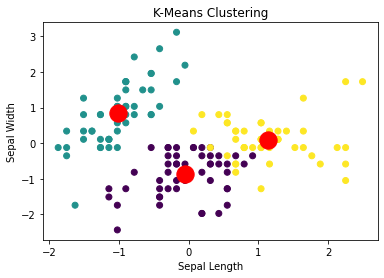

In [18]:
n_clusters = kn.knee
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_std)

plt.scatter(data_std[:,0], data_std[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('K-Means Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()



- ### Comparación de respuestas con datos reales de *iris-con-respuestas.csv*

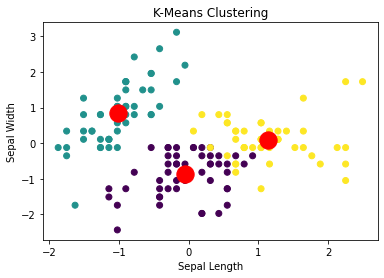

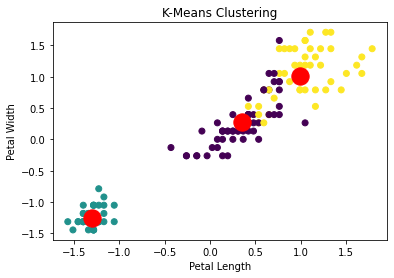

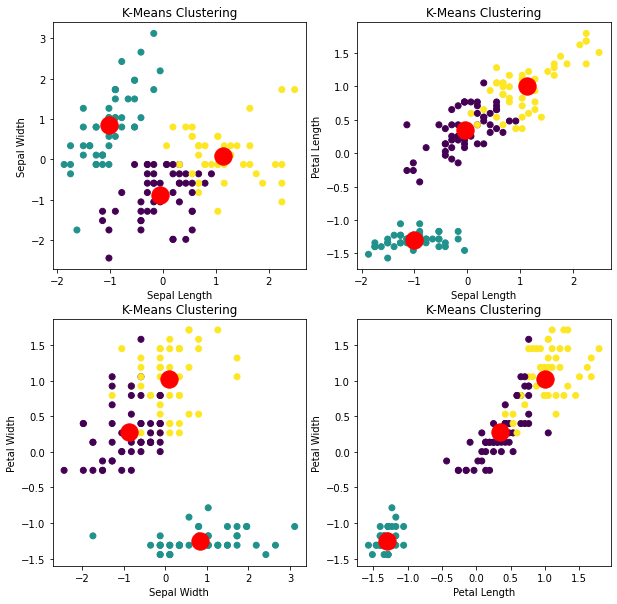

In [19]:
real_data = pd.read_csv("iris-con-respuestas.csv")
real_data = real_data.drop('species', axis=1)

plt.scatter(data_std[:,0], data_std[:,1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('K-Means Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

plt.scatter(data_std[:,2], data_std[:,3], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red')
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(data_std[:,0], data_std[:,1], c=pred_y)
axs[0, 0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
axs[0, 0].set_title('K-Means Clustering')
axs[0, 0].set_xlabel('Sepal Length')
axs[0, 0].set_ylabel('Sepal Width')

axs[0, 1].scatter(data_std[:,0], data_std[:,2], c=pred_y)
axs[0, 1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=300, c='red')
axs[0, 1].set_title('K-Means Clustering')
axs[0, 1].set_xlabel('Sepal Length')
axs[0, 1].set_ylabel('Petal Length')

axs[1, 0].scatter(data_std[:,1], data_std[:,3], c=pred_y)
axs[1, 0].scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s=300, c='red')
axs[1, 0].set_title('K-Means Clustering')
axs[1, 0].set_xlabel('Sepal Width')
axs[1, 0].set_ylabel('Petal Width')

axs[1, 1].scatter(data_std[:,2], data_std[:,3], c=pred_y)
axs[1, 1].scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red')
axs[1, 1].set_title('K-Means Clustering')
axs[1, 1].set_xlabel('Petal Length')
axs[1, 1].set_ylabel('Petal Width')

plt.show()


- ### Comparación entre clusters obtenidos y agrupaciones reales

In [20]:
from sklearn.metrics.cluster import adjusted_rand_score

real_labels = pd.read_csv("iris-con-respuestas.csv")['species']
print("Adjusted Rand Score:", adjusted_rand_score(real_labels, pred_y))

Adjusted Rand Score: 0.6201351808870379


***¿A que podría deberse la diferencia, si la hay?  ¿Les dió el número correcto de clusters, comparado a los datos reales?***

- La diferencia se podria dar si la manera en que se analizan los datos cambia entre librerias, es decir, un ejemplo de mala práctica es que realicemos con ciertas referencias operaciones con el dataset estandarizado y con otra no. De lo contrario, si la manera en que se aplican es la correcta y no presenta conflictos respecto a métodos (una carece de parámetros a enviar y otra le sobran) no se presentara mayor diferencia, cómo fue este caso. 

- Si nos dió el número correcto de clusters comparados con los reales. Lo cual se puede apreciar en las comparativas de grafica del punto pasado.

# Conclusiones

- Al momento de estandarizar los datos se pueden apreciar los clusters de una manera mucho más clara. Pero siempre es necesario realizar clustering con ML para poder apreciarlos de una manera más eficaz.

- Cualquier manera verificada de identificar clusters se puede aplicar a nuestros datos pero siempre hay que tener en cuenta que algunos métodos serán más eficientes con ciertos tipos de datos y sus tendencias.

- Tanto grafica de sépalo y pétalo permiten visualizar la cantidad de clusters reales pero de una forma distinta.

- Clustering es una forma sumamente util de analizar un dataset complejo en el cual no se pusee una clara visualización de la manera en que los datos se asocian a otros. Permitiendo identificar tendencias en grupos y afinidades.